In [3]:
# Initializations
import re

input_string = """Chandrayaan 3, India's third lunar exploration mission, was officially announced by ISRO Chairman, S. Somanath (https://www.isro.gov.in/Secretaryisro.html) on January 1, 2023 . The ambitious project aimed to build upon the successes of its predecessors, Chandrayaan 1 (launched on 22 Oct.  2008) and Chandrayaan 2 (launched on July 22, 2019). Chandrayaan-3 was launched on 14 July 2023, at 2:35 pm IST as scheduled, from Satish Dhawan Space Centre Second Launch Pad in Sriharikota, Andhra Pradesh, India. TransLunar Injection was done on 2023 August 1. The spacecraft entered lunar orbit on 5 Aug 2023, with an expected landing near the lunar South Pole on the 23rd of August. On 5/08/2023, ISRO performed a lunar-orbit insertion (LOI), successfully placing the Chandrayaan-3 spacecraft into orbit around the Moon. The LOI operation was carried out from the ISRO Telemetry, Tracking, and Command Network (ISTRAC) located in Bengaluru.
On 17 August, after a series of lunar-bound maneuvers, the Vikram lander separated from the propulsion module to begin the last phase of the mission. Chandrayaan-3 lander and rover landed near the lunar south pole region on August 23, making India the first nation to successfully land a spacecraft near the lunar south pole, and the fourth country to soft-land on the Moon."""


# Assignment 1
Date parser

In [100]:
class DateExtractor:

    # Regular expression pattern to match dates in various formats
    # dd/mm/yyyy
    date_pattern = r'(\d{1,2})/(\d{1,2})/(\d{4})|'
    # yyyy month dd
    date_pattern += r'(\d{4})\s+(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)[,|\.]?\s+(\d{1,2})|'
    # dd month yyyy
    date_pattern += r'(\d{1,2})[?:st|nd|rd|st]?\s+(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)[,|\.]?\s+(\d{4})|'
    # dd month
    date_pattern += r'(\d{1,2})[?:st|nd|rd|st]?\s+(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)[,|\.]?|'
    # dd(st|nd|rd|th) of month
    date_pattern += r'(\d{1,2})(?:st|nd|rd|th) of (January|February|March|April|May|June|July|August|September|October|November|December)|'
    # month dd yyyy
    date_pattern += r'(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?[,|\.]?|Nov(?:ember)?|Dec(?:ember)?)[,|\.]?\s+(\d{1,2})[,\.]?\s+(\d{4})|'
    # month dd
    date_pattern += r'(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?[,|\.]?|Nov(?:ember)?|Dec(?:ember)?)[,|\.]?\s+(\d{1,2})'

    # Conversion from month number to name
    month_numeric_to_name_dict = {
        "01": "January",
        "02": "February",
        "03": "March",
        "04": "April",
        "05": "May",
        "06": "June",
        "07": "July",
        "08": "August",
        "09": "September",
        "10": "October",
        "11": "November",
        "12": "December"
    }

    # Conversion from month abbreviation to name
    month_abbreviation_to_name_dict = {
        "Jan": "January",
        "Feb": "February",
        "Mar": "March",
        "Apr": "April",
        "May": "May",
        "Jun": "June",
        "Jul": "July",
        "Aug": "August",
        "Sep": "September",
        "Oct": "October",
        "Nov": "November",
        "Dec": "December"
    }

    def ExtractDates(input_string : str) -> list:
        # Find all dates in the input string, using the pattern defined above
        result = re.findall(DateExtractor.date_pattern, input_string)

        # Extrace tuples of date data from the result of the regular expression parsing
        result = [tuple(x for x in pattern if x != "") for pattern in result]

        # return in standard format
        return [DateExtractor.DateTupleParser(pattern) for pattern in result] 
    
    def DateTupleParser(extraction : tuple) -> str:
        day = ""
        month = ""
        year = ""

        # Guess what each entry in the extracted tuple is
        for entry in extraction:
            if entry.isnumeric():   # Date or year
                if len(entry) < 3:  # Day
                    day = entry
                else:
                    year = entry
            else:                   # Month
                month = entry

        if month == "":             # Month is numeric
            month = extraction[1]   # Second entry is month

        # Month to full name
        if month.isnumeric():
            month = DateExtractor.month_numeric_to_name_dict[month]
        elif len(month) == 3:
            month = DateExtractor.month_abbreviation_to_name_dict[month]

        if year == "":              # default year
            year = "2023"
        return f"{day}-{month}-{year}"  # return in required format

In [104]:

# use the above defined functions
_ = [print(date) for date in DateExtractor.ExtractDates(input_string)]


1-January-2023
22-October-2008
22-July-2019
14-July-2023
1-August-2023
5-August-2023
23-August-2023
08-August-2023
17-August-2023
23-August-2023


# Assignment 2
Sentence Segmentation

### a)
### Custom implementation

In [183]:

class SentenceSegmenter:

    def Parse(input_string : str) -> list:
        """
        Parses the input string using all added rules and returns a list of strings (containing each sentence)
        """
        # Meta function handler
        outlist = [input_string]
        for method in dir(SentenceSegmenter):
            if method[:2] == "m_":
                outlist = sum([getattr(SentenceSegmenter, method)(sentence) for sentence in outlist], start=[])

        return outlist
    

    def m_QuestionMark(input_string):
        # Simply split on questionmark
        return re.split(r"\?\s*",input_string)
    
    def m_FullStop(input_string):
        # Regular expression here matches 3 rules
        # - . followed by a capital letter
        # - Not . preceeded by a capital letter
        # - whitespaces handled

        split = re.split(r"[^A-Z\s?\.]\s*\.\s+([A-Z])", input_string)
        outlist = [split[0]]
        for sent in split[1:]:
            if len(outlist[-1]) == 1:
                outlist[-1] += sent
            else:
                outlist.append(sent)
        return outlist 
    
    # More rules can be implemented as m_[method name]

In [184]:
_ = [print(sentence) for sentence in SentenceSegmenter.Parse(input_string)]
# print(SentenceSegmenter.Parse(input_string))

Chandrayaan 3, India's third lunar exploration mission, was officially announced by ISRO Chairman, S. Somanath (https://www.isro.gov.in/Secretaryisro.html) on January 1, 202
The ambitious project aimed to build upon the successes of its predecessors, Chandrayaan 1 (launched on 22 Oct.  2008) and Chandrayaan 2 (launched on July 22, 2019
Chandrayaan-3 was launched on 14 July 2023, at 2:35 pm IST as scheduled, from Satish Dhawan Space Centre Second Launch Pad in Sriharikota, Andhra Pradesh, Indi
TransLunar Injection was done on 2023 August 
The spacecraft entered lunar orbit on 5 Aug 2023, with an expected landing near the lunar South Pole on the 23rd of Augus
On 5/08/2023, ISRO performed a lunar-orbit insertion (LOI), successfully placing the Chandrayaan-3 spacecraft into orbit around the Moo
The LOI operation was carried out from the ISRO Telemetry, Tracking, and Command Network (ISTRAC) located in Bengalur
On 17 August, after a series of lunar-bound maneuvers, the Vikram lander separat

### b)
### Using Libraries

In [82]:
!pip install spacy
!pip install nltk

import spacy
# Download the spaCy English model
!python3 -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.7 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [81]:
nlp = spacy.load('en_core_web_sm')

doc = nlp(input_string)

for sent in doc.sents:
    print(sent)


Chandrayaan 3, India's third lunar exploration mission, was officially announced by ISRO Chairman, S. Somanath (https://www.isro.gov.in/Secretaryisro.html) on January 1, 2023 .
The ambitious project aimed to build upon the successes of its predecessors, Chandrayaan 1 (launched on 22 Oct.  2008) and Chandrayaan 2 (launched on July 22, 2019).
Chandrayaan-3 was launched on 14 July 2023, at 2:35 pm IST as scheduled, from Satish Dhawan Space Centre Second Launch Pad in Sriharikota, Andhra Pradesh, India.
TransLunar Injection was done on 2023 August 1.
The spacecraft entered lunar orbit on 5 Aug 2023, with an expected landing near the lunar South Pole on the 23rd of August.
On 5/08/2023, ISRO performed a lunar-orbit insertion (LOI), successfully placing the Chandrayaan-3 spacecraft into orbit around the Moon.
The LOI operation was carried out from the ISRO Telemetry, Tracking, and Command Network (ISTRAC) located in Bengaluru.

On 17 August, after a series of lunar-bound maneuvers, the Vikra

In [85]:
import nltk
nltk.download('punkt')  # Download the Punkt tokenizer data (if not already downloaded)

for sent in nltk.sent_tokenize(input_string):
    print(sent)

Chandrayaan 3, India's third lunar exploration mission, was officially announced by ISRO Chairman, S. Somanath (https://www.isro.gov.in/Secretaryisro.html) on January 1, 2023 .
The ambitious project aimed to build upon the successes of its predecessors, Chandrayaan 1 (launched on 22 Oct.  2008) and Chandrayaan 2 (launched on July 22, 2019).
Chandrayaan-3 was launched on 14 July 2023, at 2:35 pm IST as scheduled, from Satish Dhawan Space Centre Second Launch Pad in Sriharikota, Andhra Pradesh, India.
TransLunar Injection was done on 2023 August 1.
The spacecraft entered lunar orbit on 5 Aug 2023, with an expected landing near the lunar South Pole on the 23rd of August.
On 5/08/2023, ISRO performed a lunar-orbit insertion (LOI), successfully placing the Chandrayaan-3 spacecraft into orbit around the Moon.
The LOI operation was carried out from the ISRO Telemetry, Tracking, and Command Network (ISTRAC) located in Bengaluru.
On 17 August, after a series of lunar-bound maneuvers, the Vikram

[nltk_data] Downloading package punkt to /home/unnii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


I used 2 rules to perform sentance segmentation, one where a sentance is split when a '?' is encountered and another when the regular expression of the form `[^A-Z\s?\.]\s*\.\s+([A-Z])` is encountered. This regular expression establishes 3 rules:
1. Sentance is split over '.'
2. Sentance is only split when the next letter after '.' and a space is a capital letter
3. Sentance is only split when the letter before the full stop is _not_ capital

In comparison with both spaCy and NLTK, all 3 seem to generate the same sentances.
However it can be seen that my rules don't take into consideration many cases, such as splitting on '!', and also splitting in case of sentances that end in a capital letter noun such as 'NASA' or 'I'

# Assignment 3
Heap's Law

### a)

In [6]:
with open("The Adventures of Huckleberry Finn.txt") as file:
    text = file.read()

def Tokenize(input_text):
    return re.findall(r'\b\w[\w\'-]*\b', input_text.lower())

def Find_TTR(wordList):
    return len(set(wordList))/len(wordList)

n = 2000
words = Tokenize(text)
TTRs = []
for i in range(0, len(words), n):
    TTRs.append(Find_TTR(words[i:i+n]))
    
_ = [print(f"{i*n} - {(i+1)*n}: {ttr}") for i, ttr in enumerate(TTRs)]

0 - 2000: 0.362
2000 - 4000: 0.288
4000 - 6000: 0.255
6000 - 8000: 0.281
8000 - 10000: 0.261
10000 - 12000: 0.2675
12000 - 14000: 0.2875
14000 - 16000: 0.2675
16000 - 18000: 0.2785
18000 - 20000: 0.2825
20000 - 22000: 0.3055
22000 - 24000: 0.271
24000 - 26000: 0.264
26000 - 28000: 0.306
28000 - 30000: 0.2785
30000 - 32000: 0.2985
32000 - 34000: 0.2745
34000 - 36000: 0.281
36000 - 38000: 0.2595
38000 - 40000: 0.29
40000 - 42000: 0.295
42000 - 44000: 0.3095
44000 - 46000: 0.3105
46000 - 48000: 0.2935
48000 - 50000: 0.3245
50000 - 52000: 0.295
52000 - 54000: 0.3255
54000 - 56000: 0.351
56000 - 58000: 0.326
58000 - 60000: 0.3045
60000 - 62000: 0.314
62000 - 64000: 0.3175
64000 - 66000: 0.2975
66000 - 68000: 0.308
68000 - 70000: 0.2595
70000 - 72000: 0.272
72000 - 74000: 0.3045
74000 - 76000: 0.2565
76000 - 78000: 0.2705
78000 - 80000: 0.267
80000 - 82000: 0.293
82000 - 84000: 0.2925
84000 - 86000: 0.278
86000 - 88000: 0.311
88000 - 90000: 0.263
90000 - 92000: 0.2835
92000 - 94000: 0.278
94

### b)

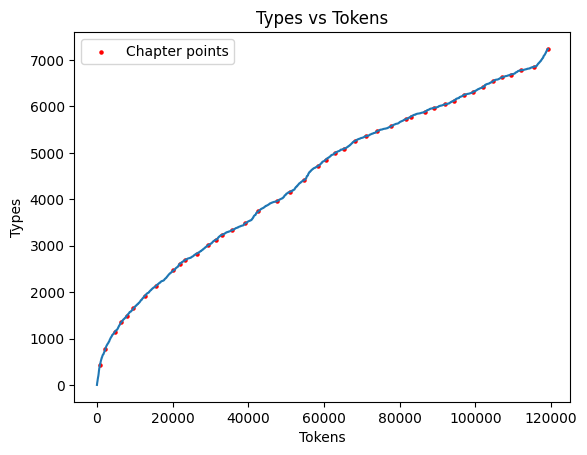

/tmp/ipykernel_5504/709594069.py:32: RuntimeWarning: divide by zero encountered in log
  plt.plot([np.log(x) for x in X], [np.log(y) for y in Y])


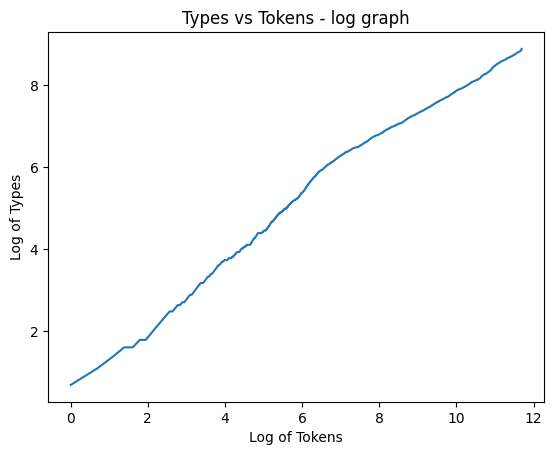

In [78]:
import matplotlib.pyplot as plt
import numpy as np

X = []
Y = []

types = set()
chapters = text.split("CHAPTER")

# plot types vs tokens (number of words)
for i, word in enumerate(words):
    types.add(word)
    Y.append(len(types))
    X.append(i)

chapter_words = 0
chapter_word_X = []
chapter_word_Y = []
for i in range(len(chapters)):
    chapter_words += len(Tokenize(chapters[i]))
    chapter_word_X.append(chapter_words)
    chapter_word_Y.append(Y[chapter_words+1])

plt.plot(X,Y)
plt.scatter(chapter_word_X,chapter_word_Y, color="r", label="Chapter points", s=5)
plt.title("Types vs Tokens")
plt.xlabel("Tokens")
plt.ylabel("Types")
plt.legend()
plt.show()

plt.plot([np.log(x) for x in X], [np.log(y) for y in Y])
plt.title("Types vs Tokens - log graph")
plt.xlabel("Log of Tokens")
plt.ylabel("Log of Types")
plt.show()

### c)

In [31]:
!pip install spacy

import spacy
# Download the spaCy English model
!python3 -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 753.0 kB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


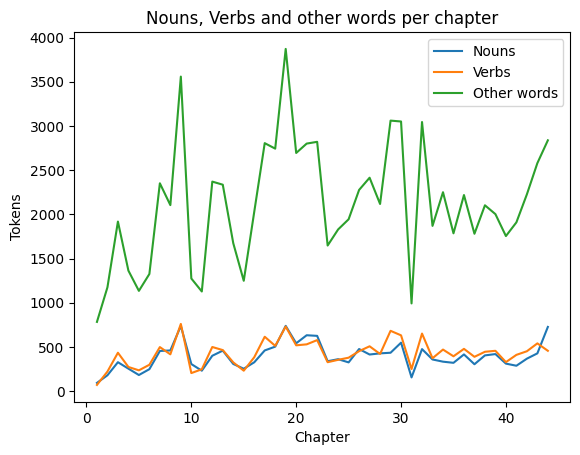

In [56]:

nlp = spacy.load('en_core_web_sm')


nouns = []
verbs = []
others = []

chapters = text.split("CHAPTER")

for chapter in chapters:
    # Process the chapter text using spaCy
    doc = nlp(chapter)


    # Calculate vocabulary for nouns, verbs, and other POS tags
    nouns.append(len([word for word in doc if word and word.pos_ == 'NOUN']))
    verbs.append(len([word for word in doc if word and word.pos_ == 'VERB']))
    others.append(len([word for word in doc if word and word.pos_ not in ('NOUN', 'VERB') and not word.is_punct]))


chapters_range = range(1, len(chapters) + 1)
plt.plot(chapters_range, nouns, label="Nouns")
plt.plot(chapters_range, verbs, label="Verbs")
plt.plot(chapters_range, others, label="Other words")
plt.legend()
plt.ylabel("Tokens")
plt.xlabel("Chapter")
plt.title("Nouns, Verbs and other words per chapter")

plt.show()
